In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine

In [2]:
data = load_wine()

In [3]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
X = pd.DataFrame(data.data, columns=[data.feature_names])

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
y = pd.Series(data.target)

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rfc", RandomForestClassifier(random_state=42))
    
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [18]:
pipe.score(X_test, y_test)

1.0

In [24]:
pd.DataFrame(pipe["rfc"].feature_importances_, columns=["importance"], index=data.feature_names).sort_values("importance", ascending=False)

,importance
color_intensity,0.180198
flavanoids,0.165947
alcohol,0.142041
proline,0.126080
od280/od315_of_diluted_wines,0.096032
hue,0.085966
total_phenols,0.059758
magnesium,0.034673
alcalinity_of_ash,0.033211
proanthocyanins,0.029778


In [25]:
pd.DataFrame(pipe["rfc"].feature_importances_, 
             columns=["importance"], 
             index=data.feature_names).sort_values("importance", ascending=False).head(4).index

Index(['color_intensity', 'flavanoids', 'alcohol', 'proline'], dtype='object')

In [26]:
X2 = X.loc[:,['color_intensity', 'flavanoids', 'alcohol', 'proline']]
X2.head()

,color_intensity,flavanoids,alcohol,proline
0,5.64,3.06,14.23,1065.0
1,4.38,2.76,13.20,1050.0
2,5.68,3.24,13.16,1185.0
3,7.80,3.49,14.37,1480.0
4,4.32,2.69,13.24,735.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42, test_size=0.3)
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rfc", RandomForestClassifier(random_state=42))
    
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [28]:
pipe.score(X_test, y_test)

0.9814814814814815

In [29]:
import pickle
with open("pipe_model.pkl", "wb") as f:
    pickle.dump(pipe, f)
    

In [31]:
X2.describe()

,color_intensity,flavanoids,alcohol,proline
count,178.000000,178.000000,178.000000,178.000000
mean,5.058090,2.029270,13.000618,746.893258
std,2.318286,0.998859,0.811827,314.907474
min,1.280000,0.340000,11.030000,278.000000
25%,3.220000,1.205000,12.362500,500.500000
50%,4.690000,2.135000,13.050000,673.500000
75%,6.200000,2.875000,13.677500,985.000000
max,13.000000,5.080000,14.830000,1680.000000


In [32]:
with open("pipe_model.pkl",  "rb") as f:
    loaded_model = pickle.load(f)

In [34]:
data2pred = [[5.0,2.0,13.0,746.0]]
loaded_model.predict(data2pred)

array([0])

In [35]:
from datetime import datetime

In [38]:
str(datetime.now())[0:19]

'2023-12-11 09:34:39'

In [39]:
from sqlalchemy import create_engine, text

In [69]:
from sqlalchemy import create_engine, text
engine = create_engine("sqlite:///mydb.db")

In [41]:
data2pred = [[5.0,2.0,13.0,746.0]]
loaded_model.predict(data2pred)


inputs = str(data2pred)
output = loaded_model.predict(data2pred)[0]
fecha = str(datetime.now())[0:19]

df = pd.DataFrame({
    "fecha": [fecha],
    "inputs": [inputs],
    "prediction": [output]
})
df

,fecha,inputs,prediction
0,2023-12-11 09:39:47,"[[5.0, 2.0, 13.0, 746.0]]",0


In [42]:
df.to_sql("predictions", con=engine, if_exists="append", index=None)

1

In [71]:
pd.read_sql("select * from predictions", con=engine).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>fecha</th>\n      <th>inputs</th>\n      <th>prediction</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2023-12-11 09:39:47</td>\n      <td>[[5.0, 2.0, 13.0, 746.0]]</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2023-12-11 10:11:33</td>\n      <td>[\'1\', \'1\', \'1\', \'1\']</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2023-12-11 10:11:35</td>\n      <td>[\'1\', \'1\', \'1\', \'1\']</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2023-12-11 10:11:42</td>\n      <td>[\'2\', \'1\', \'1\', \'1\']</td>\n      <td>1</td>\n    </tr>\n  </tbody>\n</table>'

RandomForestClassifier(random_state=42)

<Axes: >

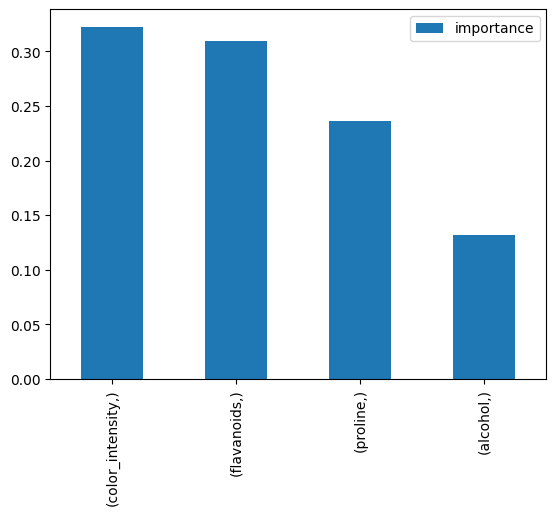

In [48]:
pd.DataFrame(pipe["rfc"].feature_importances_, columns=["importance"], index=X2.columns).sort_values("importance", ascending=False).plot(kind="bar")

In [49]:
import requests

url = "http://127.0.0.1:5000/"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

<h1>Flask app pa lo del vino</h1>


In [52]:
X_train.columns.values

array([('color_intensity',), ('flavanoids',), ('alcohol',), ('proline',)],
      dtype=object)

In [66]:
data2pred = ["1", "2", "3.4", "4"]

In [68]:
len(data2pred) == len([float(s) for s in data2pred if not s.isalpha()])

True

['1', '2', '3.4', '4']

In [76]:
start = "2023-12-11 10:11:32"
end = "2023-12-11 10:11:34"

query = f"""

    select * from predictions
    where fecha < "{end}"
    and fecha > "{start}";

"""
pd.read_sql(query, con=engine)

,fecha,inputs,prediction
0,2023-12-11 10:11:33,"['1', '1', '1', '1']",1


<Axes: >

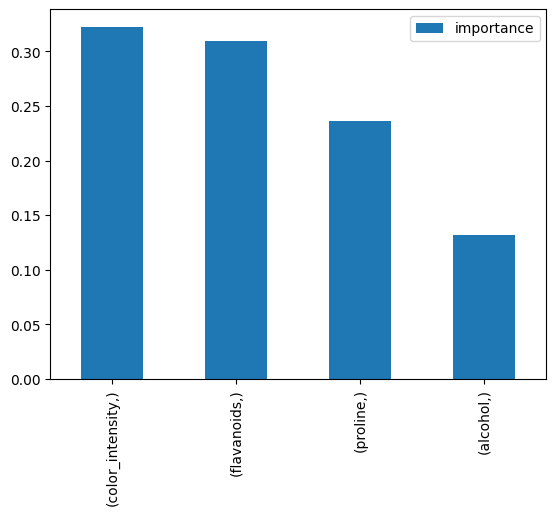

In [77]:
pd.DataFrame(pipe["rfc"].feature_importances_, columns=["importance"], index=X2.columns).sort_values("importance", ascending=False).plot(kind="bar")

In [98]:
datos_graph = pd.DataFrame(pipe["rfc"].feature_importances_, columns=["importance"], index=X2.columns).sort_values("importance", ascending=False)

In [128]:
[x[0] for x in datos_graph.values]

[0.32273493639581413,
 0.30981699671252527,
 0.23618253957338414,
 0.13126552731827645]

In [124]:
[x[0] for x in datos_graph.index]

['color_intensity', 'flavanoids', 'proline', 'alcohol']

<BarContainer object of 4 artists>

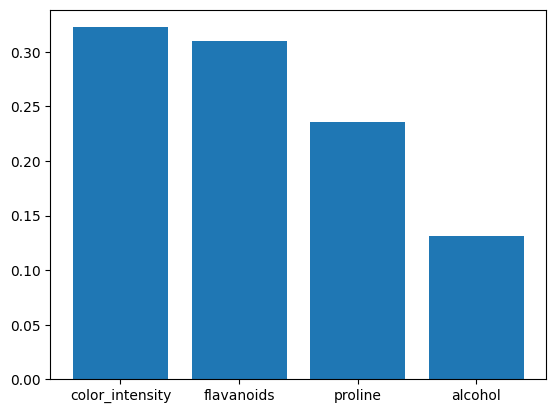

In [129]:
plt.bar([x[0] for x in datos_graph.index], [x[0] for x in datos_graph.values])

In [117]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
fig = Figure()
axis = fig.add_subplot(1, 1, 1)
axis.plot([1,2,3], [4,5,6])
plt.show()

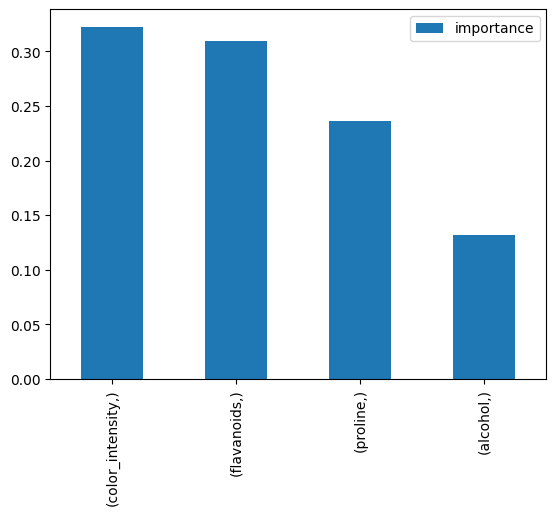

In [112]:
import matplotlib.pyplot as plt
datos_graph.plot(kind="bar")
plt.savefig("fi.png")

In [102]:
import io
io.BytesIO()

In [104]:
import urllib  
import base64  

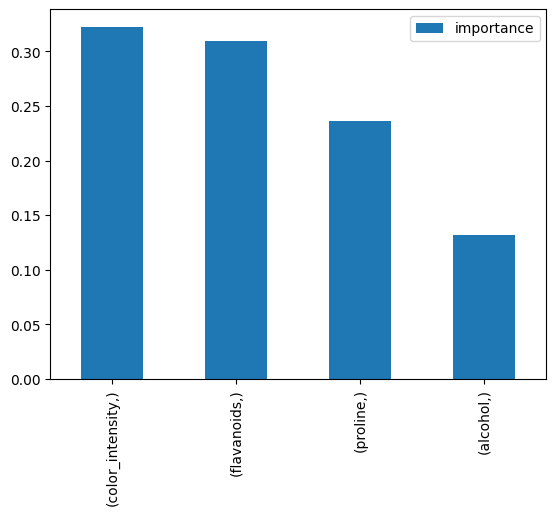

In [108]:
datos_graph.plot(kind="bar")


img = io.BytesIO()
plt.savefig(img, format = 'png')
plot_data = urllib.parse.quote(base64.b64encode(img.read()).decode())


In [109]:
plot_data

''

In [107]:
img.read()

b''

In [ ]:

img.seek(0)
plot_data = urllib.parse.quote(base64.b64encode(img.read()).decode())

In [111]:
import requests
import json

url = "http://127.0.0.1:5000/predict"

payload = json.dumps({
  "color": "1",
  "flav": "2",
  "alc": "1",
  "prol": "2"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{
  "results": {
    "prediction": "1"
  }
}

